<a href="https://colab.research.google.com/github/maxgeds/PCOL3911-QSAR-Toxicology-Project/blob/main/PCOL3911_520513026_QSAR_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Read in the created fingerprint csvs from github under data1, data2, and data4.
import pandas as pd
data1 = pd.read_csv("https://github.com/maxgeds/PCOL3911-QSAR-Toxicology-Project/raw/main/organophosphate_fp1024.csv")
data2 = pd.read_csv("https://github.com/maxgeds/PCOL3911-QSAR-Toxicology-Project/raw/main/organophosphate_fp2048.csv")
data4 = pd.read_csv("https://github.com/maxgeds/PCOL3911-QSAR-Toxicology-Project/raw/main/organophosphate_fp4096.csv")

In [ ]:
# Here we just import some functionalities from the scikit-learn library to help us with our analysis.
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
from sklearn import set_config
import numpy as np


In [ ]:
# We are going to assign some variables, which I hope is not too controversial.
# For the 1024 bit fingerprint we will use 'T" for the fingerprint itself and 'U' for the Expr values.
T = data1.iloc[:,:1024]
U = data1['Expr'].values
# For the 2048 bit fingerprint we will use 'V" for the fingerprint itself and 'W' for the Expr values.
V = data2.iloc[:,:2048]
W = data2['Expr'].values
# For the 4096 bit fingerprint we will use 'X" for the fingerprint itself and 'Y' for the Expr values.
X = data4.iloc[:,:4096]
Y = data4['Expr'].values

Now we are going to train some models! How Exciting. Here it gets kinda crazy though so I am going to split things up with headers to keep it
organised.

# TRAINING 1024 Bits: Side-By-Side Random Forest Regression and Histogram Gradient Boosting Regression



In [ ]:
# First we make the test/train split.
Ttrain, Ttest, Utrain, Utest = train_test_split(T, U, test_size=.15, random_state=42)

# Then we complete the RFR training by making predictions of U (Expr) based on the T (fingerprint).
rfr1 = RandomForestRegressor(random_state=42)
rfr1.fit(Ttrain, Utrain)
rfr_prediction1 = rfr1.predict(Ttrain)

# Then we can do the same training for HGB.
hgb1 = HistGradientBoostingRegressor(random_state=42)
hgb1.fit(Ttrain, Utrain)
hgb_prediction1 = hgb1.predict(Ttrain)

# Then we can evaluate this training using each model, side-by-side.
rfr_corr1 = np.corrcoef(rfr_prediction1, Utrain)[0,1]
rfr_score1 = rfr1.score(Ttrain, Utrain)
rfr_MSE1 = mean_squared_error(Utrain, rfr_prediction1)

hgb_corr1 = np.corrcoef(hgb_prediction1, Utrain)[0,1]
hgb_score1 = hgb1.score(Ttrain, Utrain)
hgb_MSE1 = mean_squared_error(Utrain, hgb_prediction1)

# We can put this in a neat little output to have a peak.
print("Training Scores")
print("_______________")
print("RFR MODEL Correlation:", rfr_corr1)
print("HGB MODEL Correlation:", hgb_corr1)
print("_______________")
print("RFR MODEL R-squared:", rfr_score1)
print("HGB MODEL R-squared:", hgb_score1)
print("_______________")
print("RFR MODEL MSE: ", rfr_MSE1)
print("HGB MODEL MSE: ", hgb_MSE1)
print("_______________")
print("RFR MODEL RMSE: ", rfr_MSE1**(1/2.0))
print("HGB MODEL RMSE: ", hgb_MSE1**(1/2.0))
print("_______________")


Training Scores
_______________
RFR MODEL Correlation: 0.9861856478567821
HGB MODEL Correlation: 0.9413974336209499
_______________
RFR MODEL R-squared: 0.9699196839335631
HGB MODEL R-squared: 0.8833272712644765
_______________
RFR MODEL MSE:  0.08247094251065384
HGB MODEL MSE:  0.3198806117215187
_______________
RFR MODEL RMSE:  0.2871775452758343
HGB MODEL RMSE:  0.5655798897781981
_______________


# TESTING 1024 Bits: Side-By-Side Random Forest Regression and Histogram Gradient Boosting Regression

In [ ]:
# Hopefully you can follow, here we are going to test our model now that our machine has learned. I have made some new variables.
# t1 and u1 are the test variables for the RFR model, so as not to overrite any other variables.
# a11 and b11 are the gradient and intercept for the RFR model, the first 1 represents 1024 bits, the second 1 represents the RFR model.
# t2 and u2 are the test variables for the HGB model, so as not to overrite any other variables.
# a21 and b21 are the gradient and intercept for the HGB model, the first 1 represents 1024 bits, the second 2 represents the HGB model.
t1 = Utest
u1 = rfr1.predict(Ttest)
a11, b11 = np.polyfit(t1, u1, 1)

t2 = Utest
u2 = hgb1.predict(Ttest)
a12, b12 = np.polyfit(t2, u2, 1)

# Then we can evaluate this training using each model, side-by-side.
rfr_testcorr1 = np.corrcoef(t1, u1)[0,1]
rfr_testrsquare1 = rfr_testcorr1**2
rfr_testMSE1 = mean_squared_error(t1, u1)

hgb_testcorr1 = np.corrcoef(t2, u2)[0,1]
hgb_testrsquare1 = hgb_testcorr1**2
hgb_testMSE1 = mean_squared_error(t2, u2)

# We can put this in a neat little output to have a peak.
print("Test Scores")
print("_______________")
print("RFR MODEL Correlation:", rfr_testcorr1)
print("HGB MODEL Correlation:", hgb_testcorr1)
print("_______________")
print("RFR MODEL R-squared:", rfr_testrsquare1)
print("HGB MODEL R-squared:", hgb_testrsquare1)
print("_______________")
print("RFR MODEL MSE: ", rfr_testMSE1)
print("HGB MODEL MSE: ", hgb_testMSE1)
print("_______________")
print("RFR MODEL RMSE: ", rfr_testMSE1**(1/2.0))
print("HGB MODEL RMSE: ", hgb_testMSE1**(1/2.0))
print("_______________")

Test Scores
_______________
RFR MODEL Correlation: 0.892051981905677
HGB MODEL Correlation: 0.8914813991014403
_______________
RFR MODEL R-squared: 0.7957567384218464
HGB MODEL R-squared: 0.7947390849438615
_______________
RFR MODEL MSE:  0.5418491242382402
HGB MODEL MSE:  0.5652213634401148
_______________
RFR MODEL RMSE:  0.7361040172681034
HGB MODEL RMSE:  0.7518120532687107
_______________


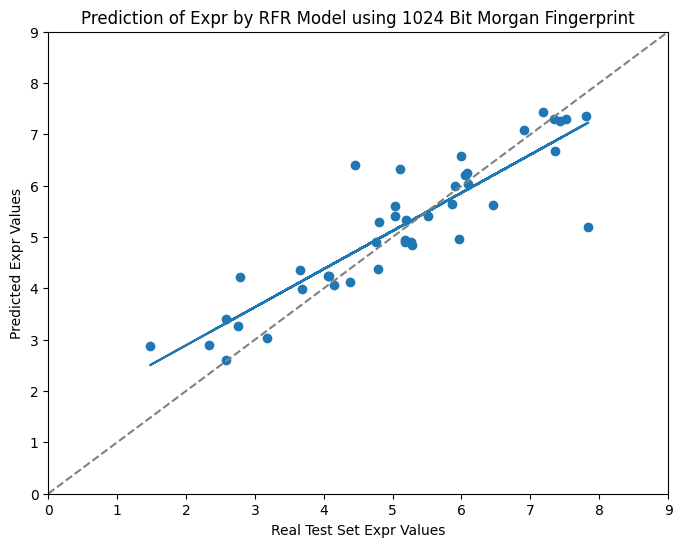

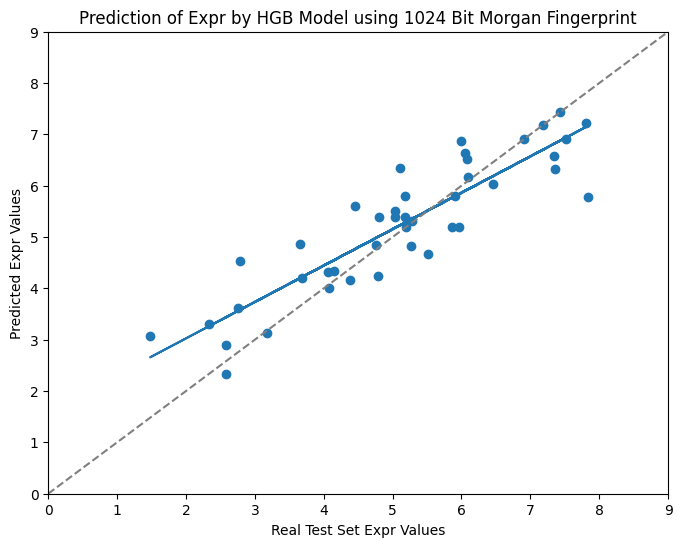

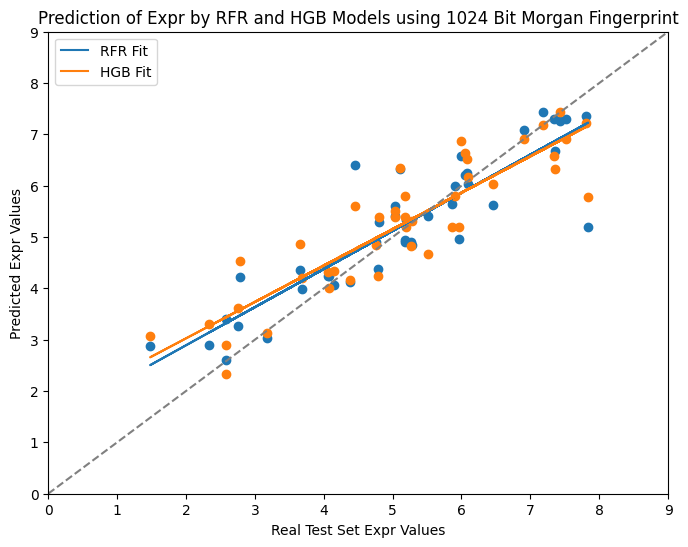

In [ ]:
# Now we can plot the test with a regression line and the line x=y representing a perfect model.
# The names of the max and min dimensions is as such, 1 for 1024 bits, then 1 or 2 for RFR or HGB respectively.
import math

plt.figure(figsize=(8, 6))
max_dim11 = math.ceil(max(t1.max(),u1.max())) +1
min_dim11 = math.floor(min(t1.min(), u1.min())) -1
plt.scatter(t1, u1)
plt.ylim([min_dim11, max_dim11])
plt.xlim([min_dim11, max_dim11])
plt.plot(t1, a11*t1+b11)
plt.plot([min_dim11, max_dim11], [min_dim11, max_dim11], linestyle='--', color='gray')
plt.title("Prediction of Expr by RFR Model using 1024 Bit Morgan Fingerprint")
plt.xlabel('Real Test Set Expr Values')
plt.ylabel('Predicted Expr Values')
plt.show()

plt.figure(figsize=(8, 6))
max_dim12 = math.ceil(max(t2.max(),u2.max())) +1
min_dim12 = math.floor(min(t2.min(), u2.min())) -1
plt.scatter(t2, u2)
plt.ylim([min_dim12, max_dim12])
plt.xlim([min_dim12, max_dim12])
plt.plot(t2, a12*t2+b12)
plt.plot([min_dim12, max_dim12], [min_dim12, max_dim12], linestyle='--', color='gray')
plt.title("Prediction of Expr by HGB Model using 1024 Bit Morgan Fingerprint")
plt.xlabel('Real Test Set Expr Values')
plt.ylabel('Predicted Expr Values')
plt.show()

# For fun we can overlap the graphs!
plt.figure(figsize=(8, 6))
plt.scatter(t1, u1)
plt.ylim([min_dim11, max_dim11])
plt.xlim([min_dim11, max_dim11])
plt.plot(t1, a11*t1+b11, label='RFR Fit')
plt.scatter(t2, u2)
plt.ylim([min_dim12, max_dim12])
plt.xlim([min_dim12, max_dim12])
plt.plot(t2, a12*t2+b12, label='HGB Fit')
plt.plot([min_dim12, max_dim12], [min_dim12, max_dim12], linestyle='--', color='gray')
plt.title("Prediction of Expr by RFR and HGB Models using 1024 Bit Morgan Fingerprint")
plt.xlabel('Real Test Set Expr Values')
plt.ylabel('Predicted Expr Values')
plt.legend()
plt.show()

# TRAINING 2048 Bits: Side-By-Side Random Forest Regression and Histogram Gradient Boosting Regression

In [ ]:
# We make the test/train split.
Vtrain, Vtest, Wtrain, Wtest = train_test_split(V, W, test_size=.15, random_state=42)

# Then we complete the RFR training by making predictions of W (Expr) based on the V (fingerprint).
rfr2 = RandomForestRegressor(random_state=42)
rfr2.fit(Vtrain, Wtrain)
rfr_prediction2 = rfr2.predict(Vtrain)

# Then we can do the same training for HGB.
hgb2 = HistGradientBoostingRegressor(random_state=42)
hgb2.fit(Vtrain, Wtrain)
hgb_prediction2 = hgb2.predict(Vtrain)

# Then we can evaluate this training using each model, side-by-side.
rfr_correlation2 = np.corrcoef(rfr_prediction2, Wtrain)[0,1]
rfr_score2 = rfr2.score(Vtrain, Wtrain)
rfr_MSE2 = mean_squared_error(Wtrain, rfr_prediction2)

hgb_correlation2 = np.corrcoef(hgb_prediction2, Wtrain)[0,1]
hgb_score2 = hgb2.score(Vtrain, Wtrain)
hgb_MSE2 = mean_squared_error(Wtrain, hgb_prediction2)

# We can put this in a neat little output to have a peak.
print("Training Scores")
print("_______________")
print("RFR MODEL Correlation:", rfr_correlation2)
print("HGB MODEL Correlation:", hgb_correlation2)
print("_______________")
print("RFR MODEL R-squared:", rfr_score2)
print("HGB MODEL R-squared:", hgb_score2)
print("_______________")
print("RFR MODEL MSE: ", rfr_MSE2)
print("HGB MODEL MSE: ", hgb_MSE2)
print("_______________")
print("RFR MODEL RMSE: ", rfr_MSE2**(1/2.0))
print("HGB MODEL RMSE: ", hgb_MSE2**(1/2.0))
print("_______________")

Training Scores
_______________
RFR MODEL Correlation: 0.9870304564506669
HGB MODEL Correlation: 0.9340114125935958
_______________
RFR MODEL R-squared: 0.9713821555322132
HGB MODEL R-squared: 0.8700410525853857
_______________
RFR MODEL MSE:  0.0784612967719139
HGB MODEL MSE:  0.3563073226126941
_______________
RFR MODEL RMSE:  0.2801094371346919
HGB MODEL RMSE:  0.5969148369848869
_______________


# TESTING 2048 Bits: Side-By-Side Random Forest Regression and Histogram Gradient Boosting Regression

In [ ]:
# Here we are going to test our model now that our machine has learned. I have made some new variables.
# v1 and w1 are the test variables for the RFR model, so as not to overrite any other variables.
# a21 and b21 are the gradient and intercept for the RFR model, the first 2 represents 2048 bits, the second 1 represents the RFR model.
# v2 and w2 are the test variables for the HGB model, so as not to overrite any other variables.
# a22 and b22 are the gradient and intercept for the HGB model, the first 2 represents 2048 bits, the second 2 represents the HGB model.
v1 = Wtest
w1 = rfr2.predict(Vtest)
a21, b21 = np.polyfit(v1, w1, 1)

v2 = Wtest
w2 = hgb2.predict(Vtest)
a22, b22 = np.polyfit(v2, w2, 1)

# Then we can evaluate this training using each model, side-by-side.
rfr_testcorr2 = np.corrcoef(v1, w1)[0,1]
rfr_testrsquare2 = rfr_testcorr2**2
rfr_testMSE2 = mean_squared_error(v1, w1)

hgb_testcorr2 = np.corrcoef(v2, w2)[0,1]
hgb_testrsquare2 = hgb_testcorr2**2
hgb_testMSE2 = mean_squared_error(v2, w2)

# We can put this in a neat little output to have a peak.
print("Test Scores")
print("_______________")
print("RFR MODEL Correlation:", rfr_testcorr2)
print("HGB MODEL Correlation:", hgb_testcorr2)
print("_______________")
print("RFR MODEL R-squared:", rfr_testrsquare2)
print("HGB MODEL R-squared:", hgb_testrsquare2)
print("_______________")
print("RFR MODEL MSE: ", rfr_testMSE2)
print("HGB MODEL MSE: ", hgb_testMSE2)
print("_______________")
print("RFR MODEL RMSE: ", rfr_testMSE2**(1/2.0))
print("HGB MODEL RMSE: ", hgb_testMSE2**(1/2.0))
print("_______________")

Test Scores
_______________
RFR MODEL Correlation: 0.8966600307662902
HGB MODEL Correlation: 0.8599054655811535
_______________
RFR MODEL R-squared: 0.8039992107738044
HGB MODEL R-squared: 0.7394374097363404
_______________
RFR MODEL MSE:  0.5161526102788139
HGB MODEL MSE:  0.6943152277062443
_______________
RFR MODEL RMSE:  0.7184376175276556
HGB MODEL RMSE:  0.8332557996835331
_______________


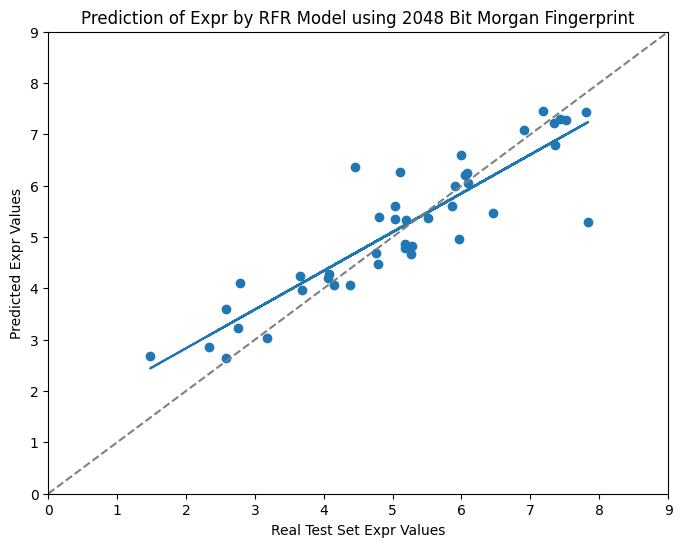

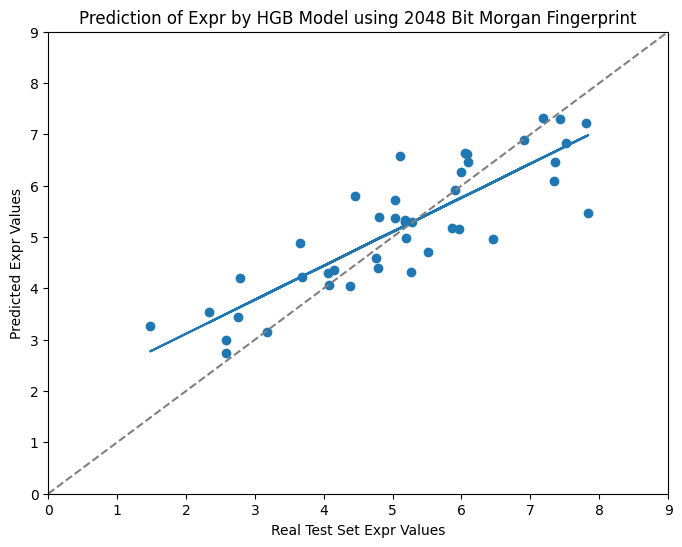

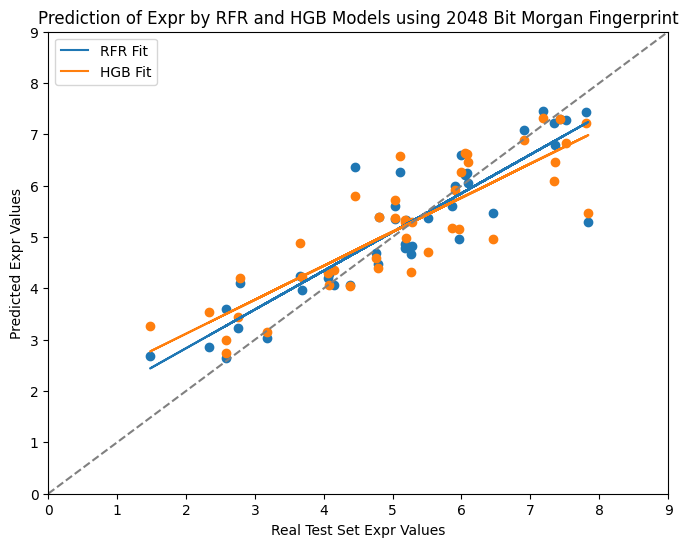

In [ ]:
# Now we can plot the test with a regression line and the line x=y representing a perfect model.
# The names of the max and min dimensions is as such, 2 for 2048 bits, then 1 or 2 for RFR or HGB respectively.
import math

plt.figure(figsize=(8, 6))
max_dim21 = math.ceil(max(v1.max(),w1.max())) +1
min_dim21 = math.floor(min(v1.min(), w1.min())) -1
plt.scatter(v1, w1)
plt.ylim([min_dim21, max_dim21])
plt.xlim([min_dim21, max_dim21])
plt.plot(v1, a21*v1+b21)
plt.plot([min_dim21, max_dim21], [min_dim21, max_dim21], linestyle='--', color='gray')
plt.title("Prediction of Expr by RFR Model using 2048 Bit Morgan Fingerprint")
plt.xlabel('Real Test Set Expr Values')
plt.ylabel('Predicted Expr Values')
plt.show()

plt.figure(figsize=(8, 6))
max_dim22 = math.ceil(max(v2.max(),w2.max())) +1
min_dim22 = math.floor(min(v2.min(), w2.min())) -1
plt.scatter(v2, w2)
plt.ylim([min_dim22, max_dim22])
plt.xlim([min_dim22, max_dim22])
plt.plot(v2, a22*v2+b22)
plt.plot([min_dim22, max_dim22], [min_dim22, max_dim22], linestyle='--', color='gray')
plt.title("Prediction of Expr by HGB Model using 2048 Bit Morgan Fingerprint")
plt.xlabel('Real Test Set Expr Values')
plt.ylabel('Predicted Expr Values')
plt.show()

# For fun we can overlap the graphs!
plt.figure(figsize=(8, 6))
plt.scatter(v1, w1)
plt.ylim([min_dim21, max_dim21])
plt.xlim([min_dim21, max_dim21])
plt.plot(v1, a21*v1+b21, label='RFR Fit')
plt.scatter(v2, w2)
plt.ylim([min_dim22, max_dim22])
plt.xlim([min_dim22, max_dim22])
plt.plot(v2, a22*v2+b22, label='HGB Fit')
plt.plot([min_dim22, max_dim22], [min_dim22, max_dim22], linestyle='--', color='gray')
plt.title("Prediction of Expr by RFR and HGB Models using 2048 Bit Morgan Fingerprint")
plt.xlabel('Real Test Set Expr Values')
plt.ylabel('Predicted Expr Values')
plt.legend()
plt.show()

# TRAINING 4096 Bits: Side-By-Side Random Forest Regression and Histogram Gradient Boosting Regression

In [ ]:
# We make the test/train split.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=.15, random_state=42)

# Then we complete the RFR training by making predictions of Y (Expr) based on the X (fingerprint).
rfr4 = RandomForestRegressor(random_state=42)
rfr4.fit(Xtrain, Ytrain)
rfr_prediction4 = rfr4.predict(Xtrain)

# Then we can do the same training for HGB.
hgb4 = HistGradientBoostingRegressor(random_state=42)
hgb4.fit(Xtrain, Ytrain)
hgb_prediction4 = hgb4.predict(Xtrain)

# Then we can evaluate this training using each model, side-by-side.
rfr_correlation4 = np.corrcoef(rfr_prediction4, Ytrain)[0,1]
rfr_score4 = rfr4.score(Xtrain, Ytrain)
rfr_MSE4 = mean_squared_error(Ytrain, rfr_prediction4)

hgb_correlation4 = np.corrcoef(hgb_prediction4, Ytrain)[0,1]
hgb_score4 = hgb4.score(Xtrain, Ytrain)
hgb_MSE4 = mean_squared_error(Ytrain, hgb_prediction4)

# We can put this in a neat little output to have a peak.
print("Training Scores")
print("_______________")
print("RFR MODEL Correlation:", rfr_correlation4)
print("HGB MODEL Correlation:", hgb_correlation4)
print("_______________")
print("RFR MODEL R-squared:", rfr_score4)
print("HGB MODEL R-squared:", hgb_score4)
print("_______________")
print("RFR MODEL MSE: ", rfr_MSE4)
print("HGB MODEL MSE: ", hgb_MSE4)
print("_______________")
print("RFR MODEL RMSE: ", rfr_MSE4**(1/2.0))
print("HGB MODEL RMSE: ", hgb_MSE4**(1/2.0))
print("_______________")

Training Scores
_______________
RFR MODEL Correlation: 0.9856773973309577
HGB MODEL Correlation: 0.9377485165421585
_______________
RFR MODEL R-squared: 0.9686784641531546
HGB MODEL R-squared: 0.8759609623153225
_______________
RFR MODEL MSE:  0.08587398405207464
HGB MODEL MSE:  0.34007675728460474
_______________
RFR MODEL RMSE:  0.29304263179966605
HGB MODEL RMSE:  0.5831610045987341
_______________


# TESTING 4096 Bits: Side-By-Side Random Forest Regression and Histogram Gradient Boosting Regression

In [ ]:
# Here we are going to test our model now that our machine has learned. I have made some new variables.
# x1 and y1 are the test variables for the RFR model, so as not to overrite any other variables.
# a41 and b41 are the gradient and intercept for the RFR model, the first 4 represents 4096 bits, the second 1 represents the RFR model.
# x2 and y2 are the test variables for the HGB model, so as not to overrite any other variables.
# a42 and b42 are the gradient and intercept for the HGB model, the first 4 represents 4096 bits, the second 2 represents the HGB model.
x1 = Ytest
y1 = rfr4.predict(Xtest)
a41, b41 = np.polyfit(x1, y1, 1)

x2 = Ytest
y2 = hgb4.predict(Xtest)
a42, b42 = np.polyfit(x2, y2, 1)

# Then we can evaluate this training using each model, side-by-side.
rfr_testcorr4 = np.corrcoef(x1, y1)[0,1]
rfr_testrsquare4 = rfr_testcorr4**2
rfr_testMSE4 = mean_squared_error(x1, y1)

hgb_testcorr4 = np.corrcoef(x2, y2)[0,1]
hgb_testrsquare4 = hgb_testcorr4**2
hgb_testMSE4 = mean_squared_error(x2, y2)

# We can put this in a neat little output to have a peak.
print("Test Scores")
print("_______________")
print("RFR MODEL Correlation:", rfr_testcorr4)
print("HGB MODEL Correlation:", hgb_testcorr4)
print("_______________")
print("RFR MODEL R-squared:", rfr_testrsquare4)
print("HGB MODEL R-squared:", hgb_testrsquare4)
print("_______________")
print("RFR MODEL MSE: ", rfr_testMSE4)
print("HGB MODEL MSE: ", hgb_testMSE4)
print("_______________")
print("RFR MODEL RMSE: ", rfr_testMSE4**(1/2.0))
print("HGB MODEL RMSE: ", hgb_testMSE4**(1/2.0))
print("_______________")

Test Scores
_______________
RFR MODEL Correlation: 0.888934327818583
HGB MODEL Correlation: 0.8308319298062161
_______________
RFR MODEL R-squared: 0.7902042391742758
HGB MODEL R-squared: 0.6902816955855212
_______________
RFR MODEL MSE:  0.6128289048375565
HGB MODEL MSE:  0.9344732204498936
_______________
RFR MODEL RMSE:  0.7828338935160871
HGB MODEL RMSE:  0.9666815506928296
_______________


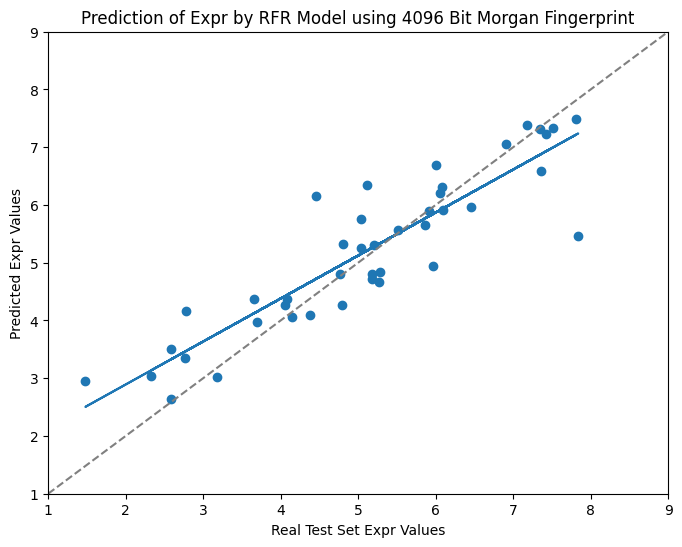

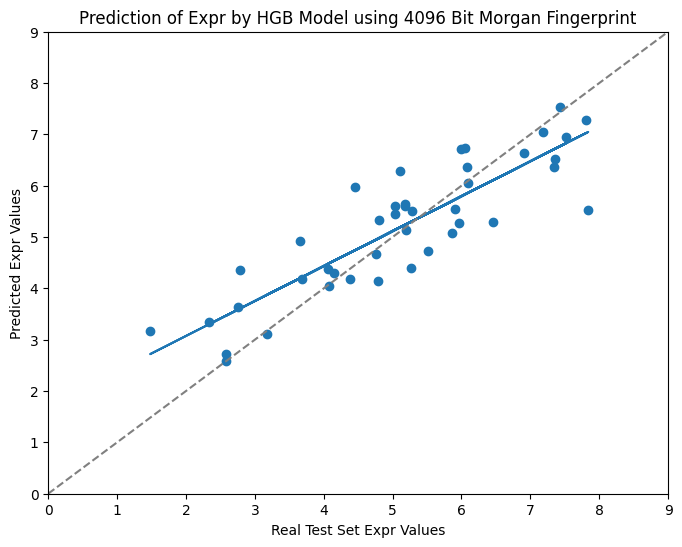

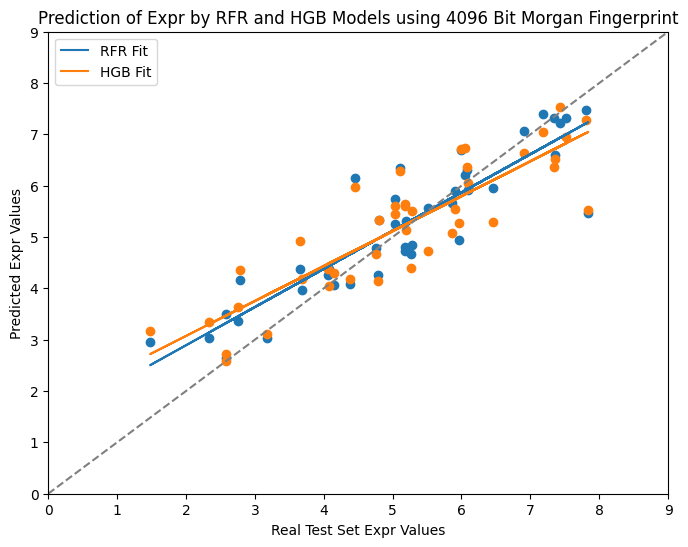

In [ ]:
# Now we can plot the test with a regression line and the line x=y representing a perfect model.
# The names of the max and min dimensions is as such, 4 for 4096 bits, then 1 or 2 for RFR or HGB respectively.
import math

plt.figure(figsize=(8, 6))
max_dim41 = math.ceil(max(x1.max(),x1.max())) +1
min_dim41 = math.floor(min(y1.min(),y1.min())) -1
plt.scatter(x1, y1)
plt.ylim([min_dim41, max_dim41])
plt.xlim([min_dim41, max_dim41])
plt.plot(x1, a41*x1+b41)
plt.plot([min_dim41, max_dim41], [min_dim41, max_dim41], linestyle='--', color='gray')
plt.title("Prediction of Expr by RFR Model using 4096 Bit Morgan Fingerprint")
plt.xlabel('Real Test Set Expr Values')
plt.ylabel('Predicted Expr Values')
plt.show()

plt.figure(figsize=(8, 6))
max_dim42 = math.ceil(max(x2.max(),y2.max())) +1
min_dim42 = math.floor(min(x2.min(), y2.min())) -1
plt.scatter(x2, y2)
plt.ylim([min_dim42, max_dim42])
plt.xlim([min_dim42, max_dim42])
plt.plot(x2, a42*x2+b42)
plt.plot([min_dim42, max_dim42], [min_dim42, max_dim42], linestyle='--', color='gray')
plt.title("Prediction of Expr by HGB Model using 4096 Bit Morgan Fingerprint")
plt.xlabel('Real Test Set Expr Values')
plt.ylabel('Predicted Expr Values')
plt.show()

# For fun we can overlap the graphs!
plt.figure(figsize=(8, 6))
plt.scatter(x1, y1)
plt.ylim([min_dim41, max_dim41])
plt.xlim([min_dim41, max_dim41])
plt.plot(x1, a41*x1+b41, label='RFR Fit')
plt.scatter(x2, y2)
plt.ylim([min_dim42, max_dim42])
plt.xlim([min_dim42, max_dim42])
plt.plot(x2, a42*x2+b42, label='HGB Fit')
plt.plot([min_dim42, max_dim42], [min_dim42, max_dim42], linestyle='--', color='gray')
plt.title("Prediction of Expr by RFR and HGB Models using 4096 Bit Morgan Fingerprint")
plt.xlabel('Real Test Set Expr Values')
plt.ylabel('Predicted Expr Values')
plt.legend()
plt.show()

In [ ]:
# Now we can export the models.
import joblib
joblib.dump(rfr1, 'rfr_1024.pkl')
joblib.dump(hgb1, 'hgb_1024.pkl')

joblib.dump(rfr2, 'rfr_2048.pkl')
joblib.dump(hgb2, 'hgb_2048.pkl')

joblib.dump(rfr4, 'rfr_4096.pkl')
joblib.dump(hgb4, 'hgb_4096.pkl')

['hgb_4096.pkl']